<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN
Convolution(畳み込み)層, Pooling層を混合させる

[To some Internal Section](#section_id)

+ パラメタの削減
    二次元画像は、データ量が膨大にもかかわらず近くの画素同士の関連は強いのに対し、遠くの画素同士の関連は弱い。

    →畳み込み層で近くの画素同士の結合だけを考えてパラメタ数を減らす。

    また、パラメタを共有することで「どこ」にあるのかという情報を排除し、より画像としての特徴に本質的なものだけを残す。

+ 畳み込み層の意味
    そのフィルタに対する類似度のようなものの計算
    フィルタサイズを大きくすると広い範囲の特徴を、小さくすると局所的な特徴を獲得できる




Kerasにおいて畳み込み層を設定するには`keras.layers.Conv2D`を使用します。

主な引数は以下のとおりです。
- `filters`: フィルター (カーネル) の数
- `kernel_size`: フィルターの大きさ
- `strides`: フィルターを動かす幅

    入力の縦or横の次元数を$N$、フィルタの縦or横の次元数を$F$、フィルタを動かす幅を$S$とすると、出力のサイズは以下のように計算できます。

$$ (N-F)/S+1$$

- `padding`: パディング
- `activation`: 活性化関数
- `use_bias`: バイアス項の有無


In [ ]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
#y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
#y_test = np.eye(10)[y_test.astype('int32').flatten()]

#one-hotベクトル
y_train = to_categorical(y_train,dtype='int32')
y_test = to_categorical(y_test,dtype='int32')

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=10000)

y_train = np.eye(10)[y_train.astype('int32').flatten()]
ラベル番号が並ぶyをone-hotベクトルに変換する

y_train = to_categorical(y_train,dtype='int')
と同様

In [ ]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

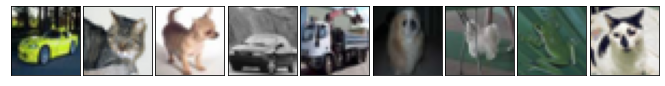

In [ ]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model

In [ ]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
%%time
early_stopping = EarlyStopping(patience=1, verbose=1)
history=model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=0,
            validation_data=(x_valid, y_valid), callbacks=[early_stopping])

Epoch 00005: early stopping


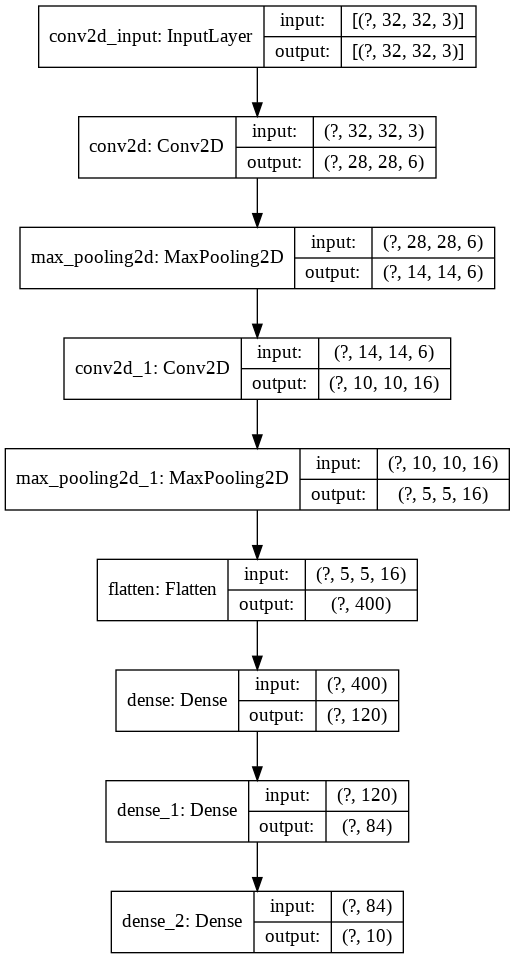

In [ ]:
# モデル構造の可視化
from keras.utils import plot_model
plot_model(model, show_shapes=True,)

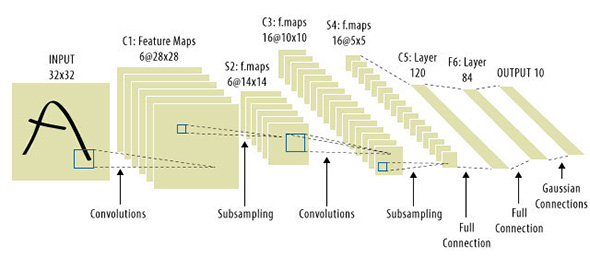

https://techfactory.itmedia.co.jp/tf/articles/1702/07/news035.html

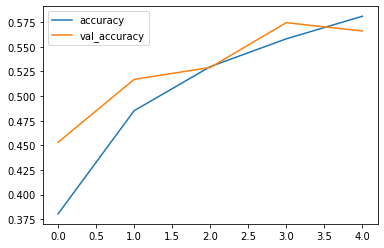

In [ ]:
result = pd.DataFrame(history.history)
result[["accuracy", "val_accuracy"]].plot()

# Data Augmentation
poolingにより細かいずれがあっても特徴を獲得すrことができるが、大きなずれや回転、

反転などに対しては同じ特徴と認識することができない。

画像を疑似的に編集し、画像の量を増やす

## オリジナル画像

<a id='section_id'></a>

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

## 左右にずらす

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.4)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 上下にずらす

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.4)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 左右反転

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 回転

In [ ]:
datagen = ImageDataGenerator(rotation_range=30)

datagen.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(x_batch[i])
    break

## 実行コード

In [ ]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,  # 3.1.1 左右にずらす
    height_shift_range=0.2,  # 3.1.2 上下にずらす
    horizontal_flip=True,  # 3.1.3 左右反転
    # 3.2.1 Global Contrast Normalization (GCN) (Falseに設定しているのでここでは使用していない)
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False)  # 3.2.2 Zero-phase Component Analysis (ZCA) Whitening (Falseに設定しているのでここでは使用していない)

In [ ]:
history_AD=  model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                       steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

In [ ]:
result_AD = pd.DataFrame(history_AD.history)
result_AD[["accuracy", "val_accuracy"]].plot()

その他にも色々あるので詳細は公式のドキュメントを参照してください。

Keras ImageDataGenerator: https://keras.io/preprocessing/image/

# 画像の正規化

## Global Contrast Normalization (GCN)


画像ごとにピクセルの値を平均0、分散1に正規化します。

$$x^{norm} = \frac{x - \mu}{\sqrt{\sigma}}$$

In [ ]:
# 可視化用に値のrangeを[0, 1]に修正
def normalize(x):
    #keepdims=Trueは入力と出力の次元を合わせる
    #axis=どの軸方向に要素を足し合わせていくか
    max_x = np.max(x, axis=(0, 1), keepdims=True)
    min_x = np.min(x, axis=(0, 1), keepdims=True)
    return (x - min_x) / (max_x - min_x)

## Zero-phase Component Analysis (ZCA) Whitening

入力の各要素間の相関をゼロ(白色化)にします。

PCAを利用して共分散行列を単位行列化 (分散1、共分散0) したのち、元の空間に戻します。


$$
    x^{ZCA} = A\Lambda^{-\frac{1}{2}}\Lambda^{T}(x - \mu)
$$


各ピクセル、各色成分について隣との差分を強調するフィルタ
目に隣接するピクセルは目の色の補色になっている。 

これが各ピクセル、各色成分について隣との差分を強調するフィルタの正体

https://sakataharumi.hatenablog.jp/entry/2016/10/18/20161018020000/

http://kikei.github.io/ai/2018/03/28/cifar10-whitening.html

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


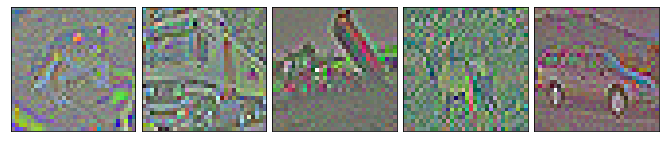

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

# Batch Normalization

入力画像に対して正規化をおこなったように、各隠れ層の入力の分布も安定させたいと考えます。
これがない場合、深層のネットワークにおいては層を重ねるほど分布が不安定になります。
特に深層学習において、学習データと検証(評価)データ間で各層の分布が変わってしまう現象は **内部共変量シフト** と呼ばれます.

**Batch Normalization** では各層の出力を正規化することでこの問題の解決を試みます。

ある層への入力を$X\in\mathcal{R}^{H\times W\times C\times N}$(H:縦の次元数、W:横の次元数、C:チャンネル数、N:バッチサイズ)とすると、それぞれのチャンネルに対して平均・分散$\mu$、$\sigma^2\in\mathcal{R}^{H\times W\times C}$を計算し、正規化を行います。
$$
    \hat{X} = \frac{X - \mu}{\sigma}
$$
その後、平均・分散を調整する学習パラメータ$\gamma、\beta\in\mathcal{R}^{H\times W\times C}$を用いて出力を計算します。
$$
    Y = \gamma \hat{X} + \beta
$$

これにより、各層の出力の分布を安定させることができます。

**各層への入力の分布を安定させるためにバッチ方向に対して正規化を行う。**

$\star$ 後続の研究で、Batch Normalizationは内部共変量シフトを軽減させる効果は実はほとんどないことが実験的に示されています。
一方でBatch Normalizationにより損失関数・勾配の形状が緩やかになり、勾配法などによる最適化が容易になることが実験的に・一部理論的に示されています。

```python
from keras.layers.normalization import BatchNormalization

...
model.add(BatchNormalization())
...


# Skip Connection

層を飛び越えた結合をつくることで勾配消失問題を解消しようとする手法

逆伝播の際に出力層側から誤差をそのまま入力層側に伝えることで、勾配が消失しにくいネットワーク構造をつくっていると考えることができます。

In [35]:
def resblock(x, filters=64, kernel_size=(3, 3)):
    x_ = Conv2D(filters, kernel_size, padding='same')(x)
    x_ = BatchNormalization()(x_)
    x_ = Conv2D(filters, kernel_size, padding='same')(x_)
    x = Add()([x_, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

from keras import backend as K

inputs = Input(shape=(32, 32, 3))

x = Conv2D(64, kernel_size=(5, 5), padding='same', activation='relu')(inputs)
x = resblock(x)
x = resblock(x)
x = Flatten()(x)
y = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=y)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=3, verbose=1)


Epoch 1/3
391/391 [==============================] - 1259s 3s/step - loss: 3.9225 - accuracy: 0.3722
Epoch 2/3
391/391 [==============================] - 1243s 3s/step - loss: 1.2863 - accuracy: 0.5468
Epoch 3/3
391/391 [==============================] - 1248s 3s/step - loss: 1.0805 - accuracy: 0.6214


In [ ]:
score = model

# 学習済みネットワークの利用

畳み込みニューラルネットワークの入力層付近では局所的な特徴 (エッジなど) を抽出しています。これらの特徴は多くの画像データに共通しています。

このことを利用し、あらかじめ別の大規模なデータセットで十分に学習されたネットワークの出力層以外の重みを初期値として活用することを考えます。

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]



model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))


上記のようにモデルを構築したのち、ロードした重みを各層に設定します。


# weightの初期化
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])


# 学習させたモデルの保存・再利用

学習させたモデルは`hdf5`形式で保存することができます。

```python
model.save('./mnist_cnn.h5')
```

#### 3.6.2 再利用

保存されたモデルは以下のようにロードして再利用することができます。

```python
from tensorflow.keras.models import load_model

model = load_model('./mnist_cnn.h5')

y_pred = model.predict(x_valid)
```